TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
#https://www.amazon.in/VILLAIN-Premium-Perfume-Lasting-Fragrance/product-reviews/B09C1XDPBY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [2]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install tweepy

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/98.5 kB ? eta -:--:--
     ----                                     10.2/98.5 kB ? eta -:--:--
     -----------                            30.7/98.5 kB 660.6 kB/s eta 0:00:01
     ---------------                        41.0/98.5 kB 495.5 kB/s eta 0:00:01
     -----------------------                61.4/98.5 kB 469.7 kB/s eta 0:00:01
     -------------------------------        81.9/98.5 kB 459.5 kB/s eta 0:00:01
     -------------------------------------- 98.5/98.5 kB 377.3 kB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver


In [6]:
villian_reviews=[]

Extracting reviews from amazon for product Villian Premium Perfume

In [7]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/VILLAIN-Premium-Perfume-Lasting-Fragrance/product-reviews/B09C1XDPBY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    villian_reviews = villian_reviews+op

In [8]:
villian_reviews

['\nExcellent perfume with a very premium and decent look. Such a strong and sweet fragnance. Premium quality in this price. Bought it first time and just loved it. Packing is also good. Perfectly matches my expectations.\n',
 '\nThis product smell is very good but long lasting. Sprea for morning and maximum of 3 to 4 hours long time to My clothes. Not impressed to buy this perfume.\n',
 '\nThis villain perfume is having the most and good fragmance i have ever use.it is long lasting and coming with very decent smell.it looks very premium and good to smell.and it is money worth must try it\n',
 "\nVillain OUD Eau De Parfum is an enchanting and captivating fragrance that exudes a sense of mystery and sophistication. The bold blend of rich oud, smoky incense, and warm spices creates an intriguing aura that's perfect for special occasions or those moments when you want to make a lasting impression. The longevity and sillage of the scent are impressive, ensuring that it lingers throughout t

In [9]:
reviews = ' '.join(villian_reviews)


##Data Cleaning


In [ ]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower()
reviews = re.sub("[0-9" "]+"," ",reviews).lower()
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

#Tokenize

In [ ]:
nltk.download('punkt')
reviews_token = word_tokenize(reviews)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
nltk.download('stopwords')
reviews_without_sw = [w for w in reviews_token if not w in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
reviews_without_sw


['ordered',
 'product',
 'month',
 'larger',
 'box',
 'cover',
 'box',
 'perfume',
 'external',
 'hard',
 'box',
 'missing',
 'price',
 'higher',
 'time',
 'product',
 'received',
 'lacked',
 'past',
 'packaging',
 'perfume',
 'love',
 'disappointed',
 'packaging',
 'suppose',
 'gift',
 'similar',
 'packaging',
 'smells',
 'long',
 'lasting',
 'upset',
 'worth',
 'money',
 'long',
 'lasting',
 'nice',
 'product',
 'quality',
 'container',
 'nice',
 'frangrence',
 'projection',
 'college',
 'long',
 'lasting',
 'smell',
 'gas',
 'amazing',
 'fragrance',
 'regular',
 'owsome',
 'nice',
 'fregnance',
 'nice',
 'smelling',
 'fragrance',
 'long',
 'lasting',
 'oud',
 'fragrance',
 'stays',
 'hours',
 'villain',
 'perfume',
 'fragrance',
 'exudes',
 'mystery',
 'allure',
 'making',
 'unique',
 'addition',
 'collection',
 'moment',
 'applied',
 'captivated',
 'intriguing',
 'blend',
 'notes',
 'opening',
 'bold',
 'assertive',
 'hints',
 'citrus',
 'spices',
 'command',
 'attention',
 'fragra

In [18]:
reviews=' '.join(reviews_without_sw)


#Word cloud

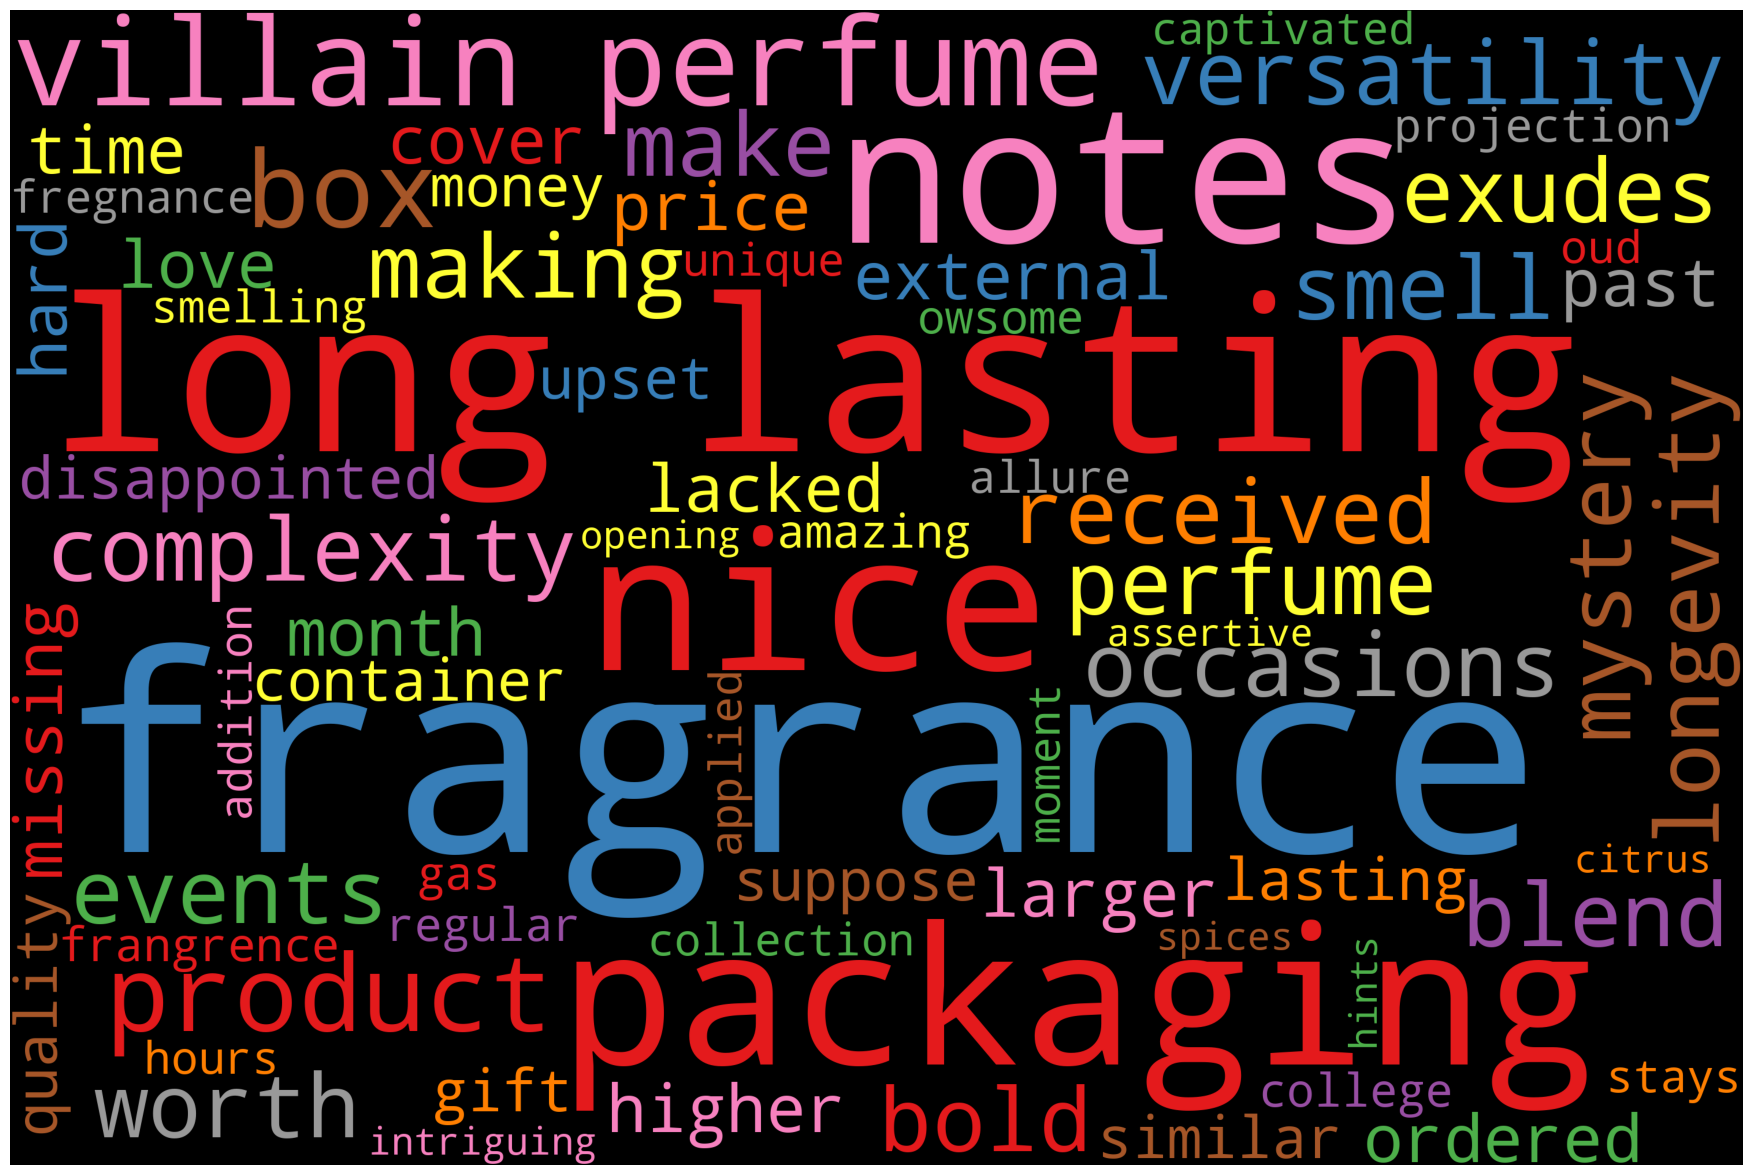

In [22]:
# All words wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud)
    plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

Word Cloud for negative word


In [24]:
# negative words
with open('/content/negative-words.txt','r',encoding='latin-1') as neg:
  negwords=neg.read().split('\n')


In [26]:
negwords = negwords[35:]


In [28]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negwords])


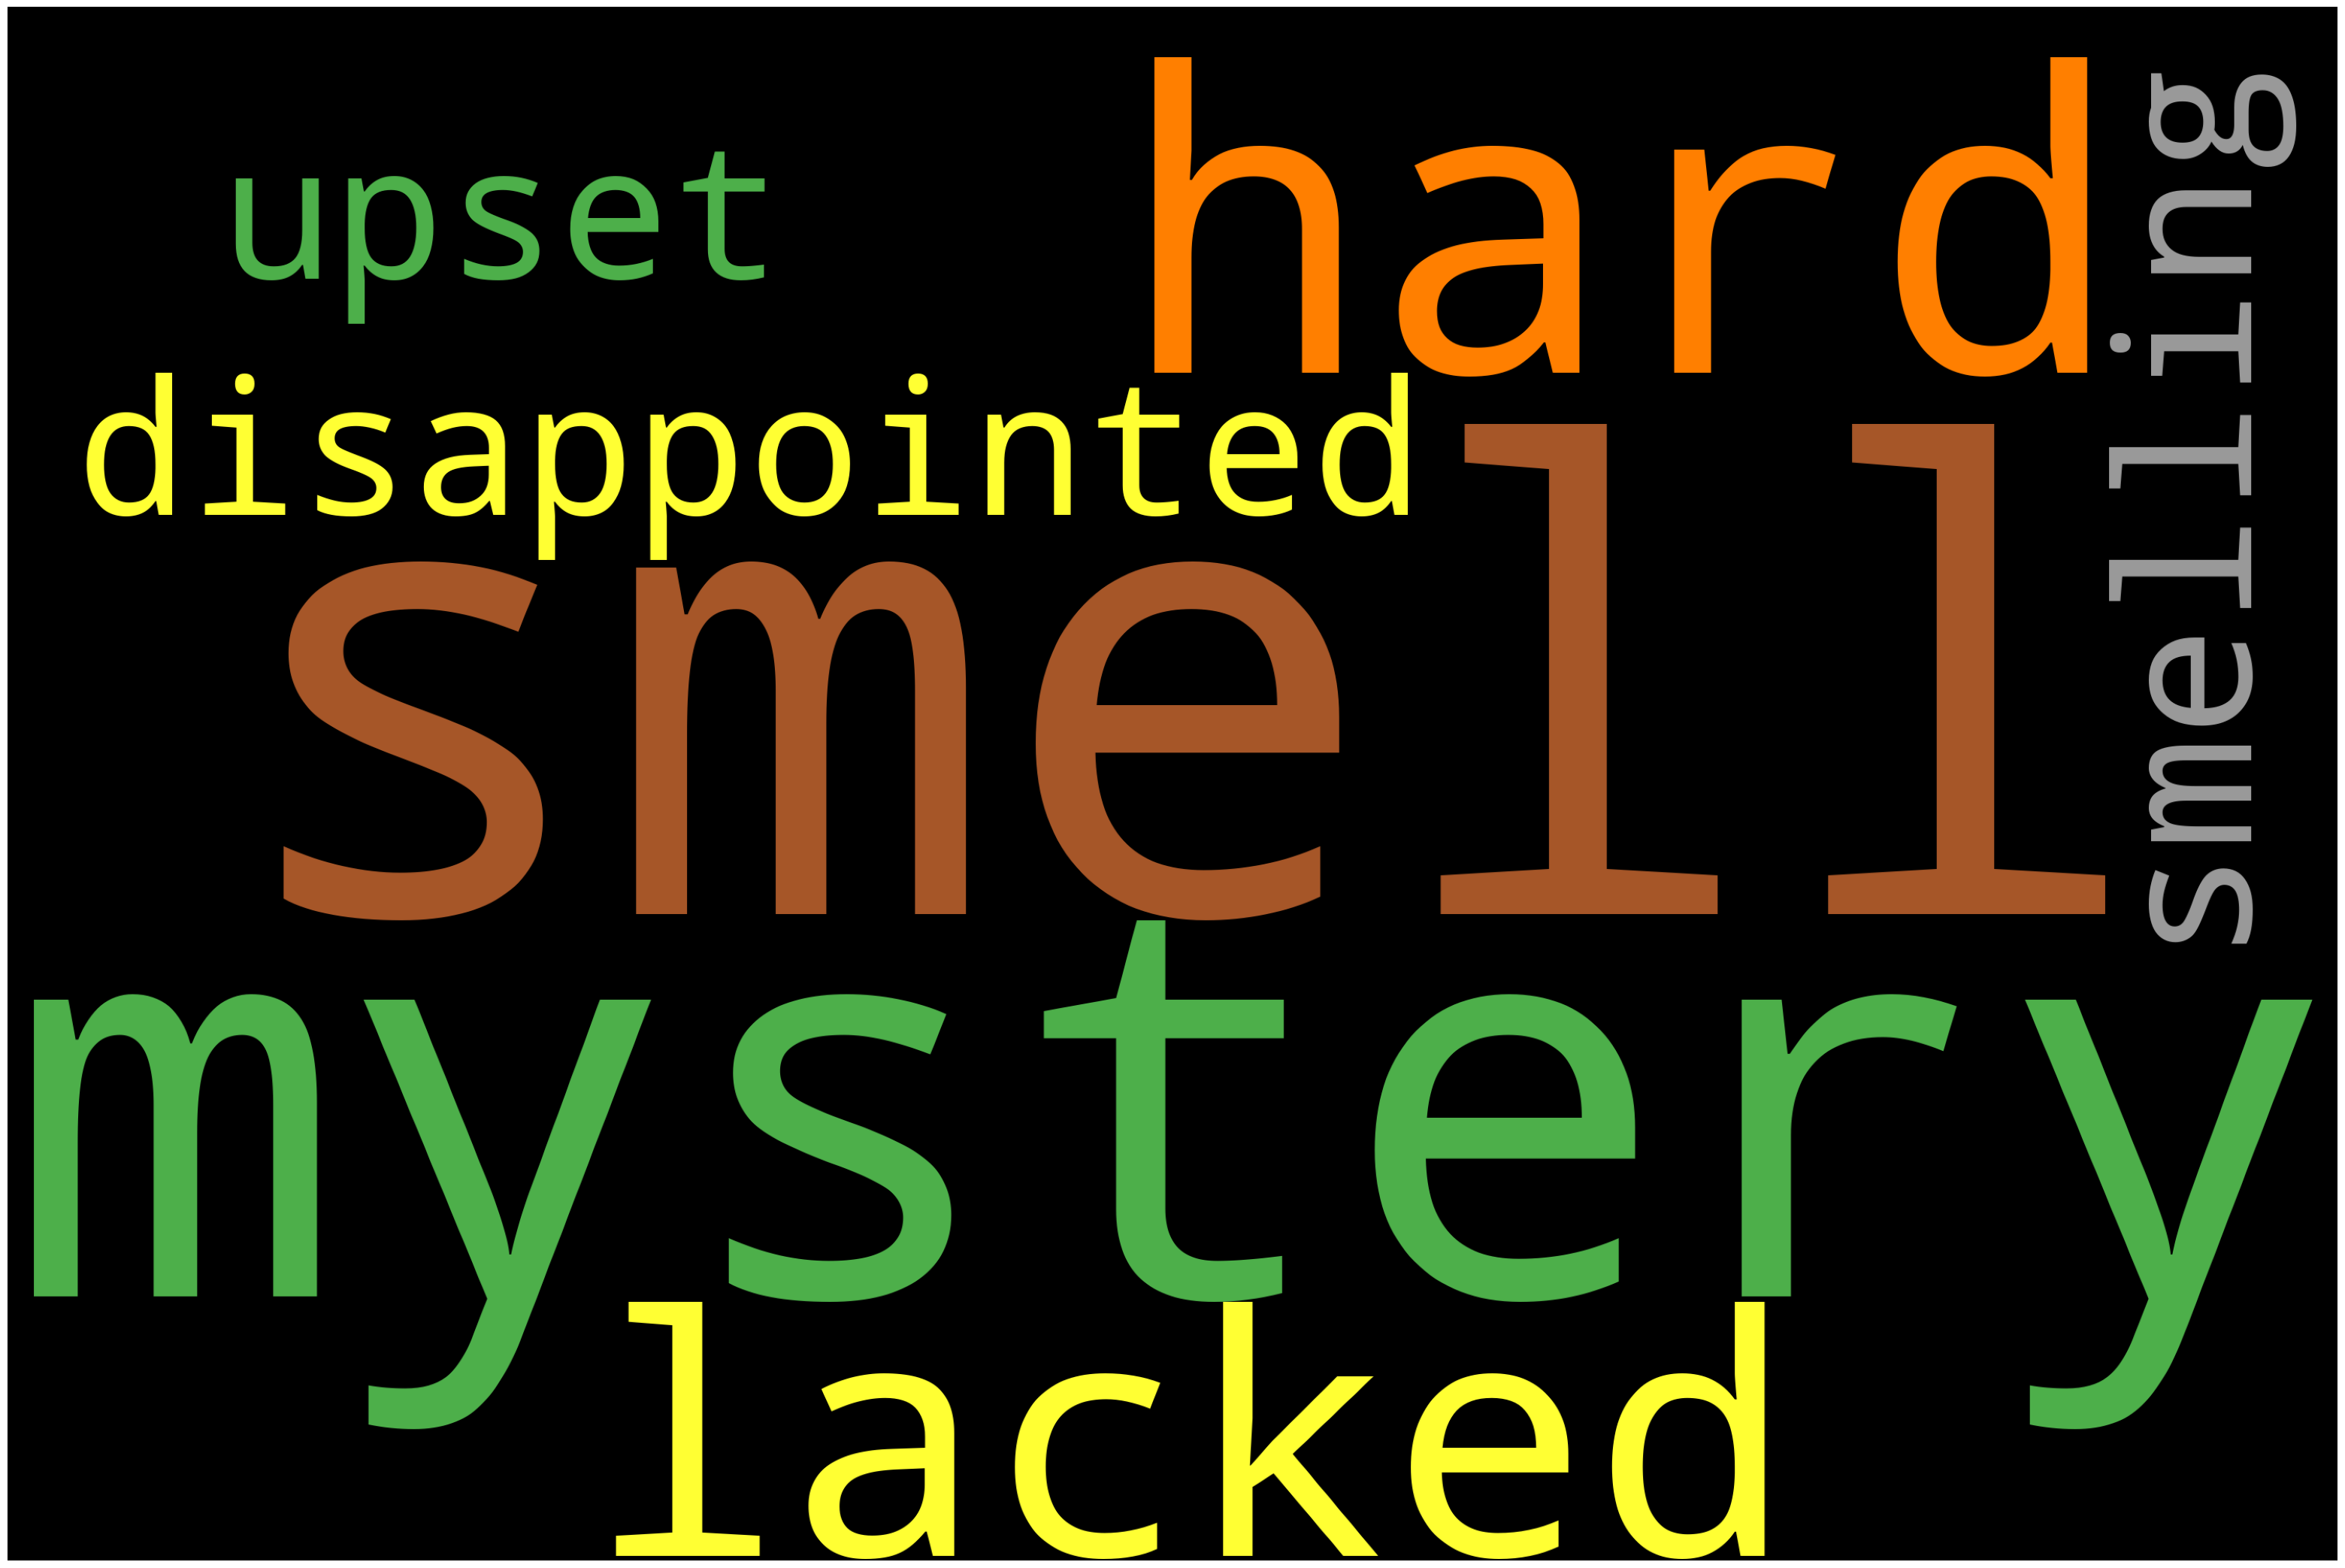

In [29]:
# Negative words wordcloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [30]:
#positive words
with open('/content/positive-words.txt','r',encoding='latin-1') as pos:
  poswords=pos.read().split('\n')

In [31]:
poswords = poswords[35:]


In [33]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in poswords])

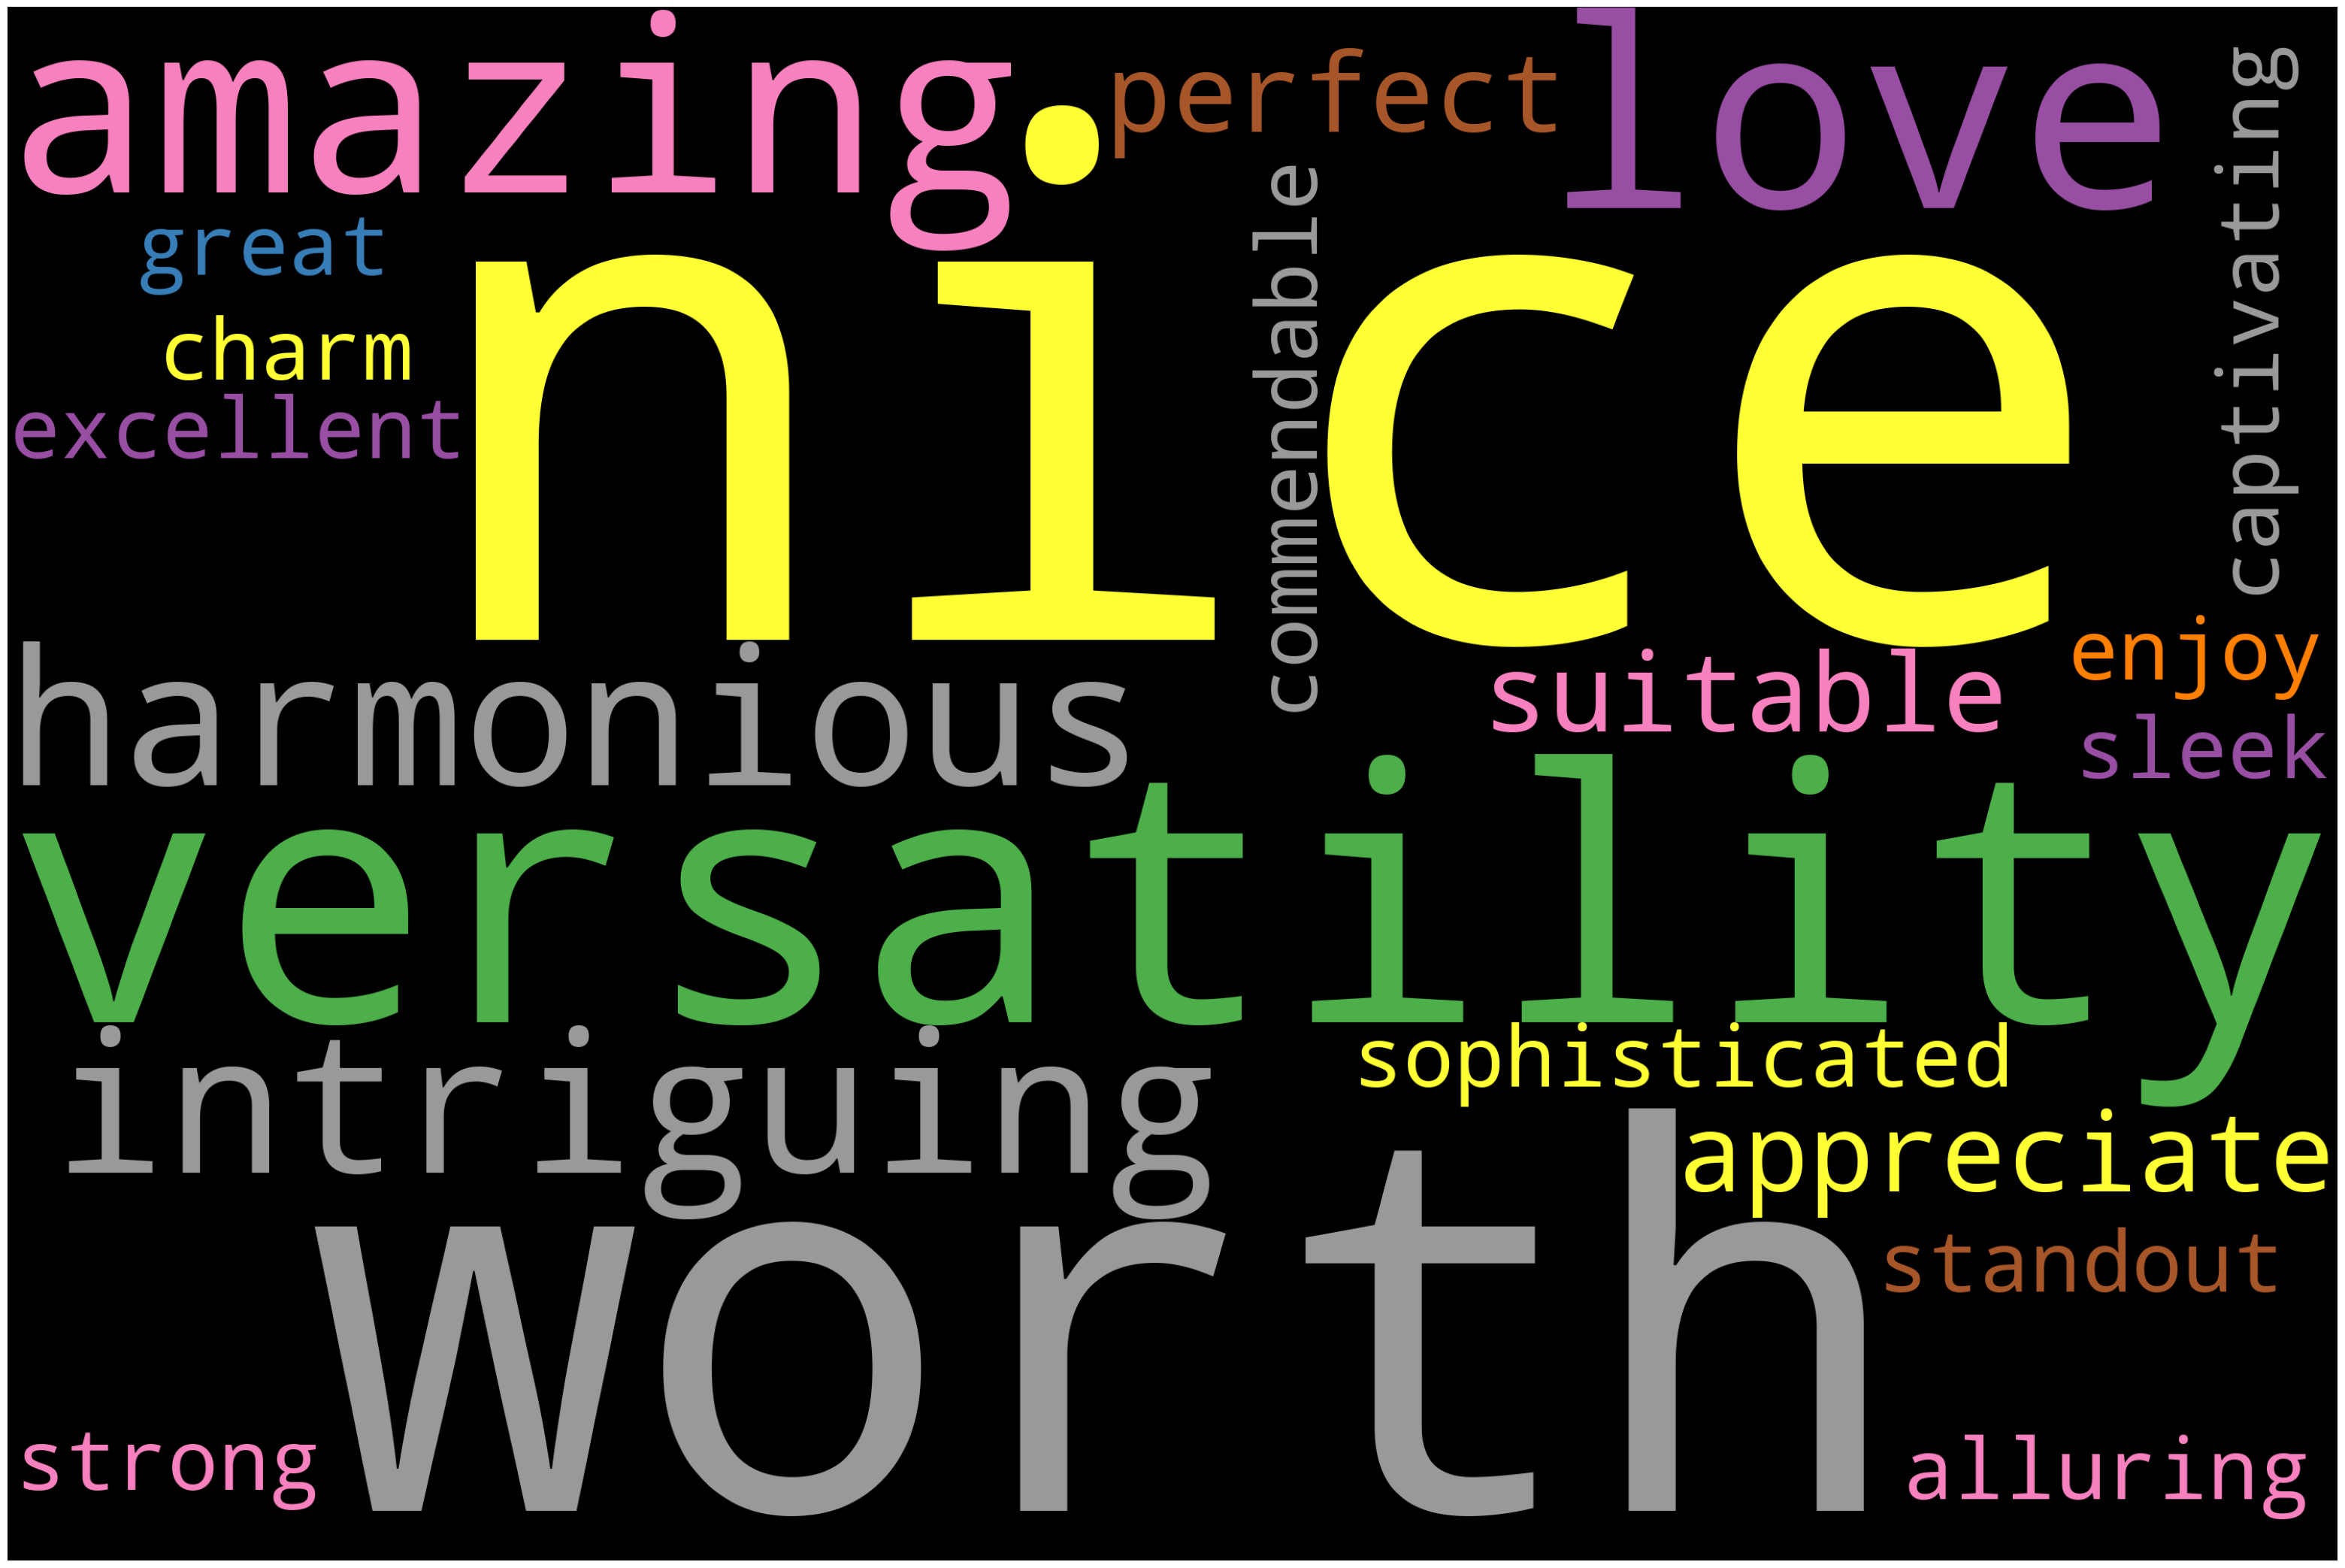

In [34]:
# Positive words wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)

In [35]:
len(reviews_pos)

215

In [36]:
len(reviews_neg)

68

In [37]:
len(reviews)

1443

Positive = 215/1443 ; Negative = 68/1443

Vander Lexicon

In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
sia = SentimentIntensityAnalyzer()

In [41]:
sia.polarity_scores(reviews)

{'neg': 0.095, 'neu': 0.607, 'pos': 0.299, 'compound': 0.9933}

In [42]:
def get_vader_sentiment(review):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text
    analysis = sia.polarity_scores(review)
    # set sentiment
    if analysis["compound"] > 0:
        return 'positive sentiment'
    elif analysis["compound"] < 0:
        return 'negative sentiment'
    else:
        return 'neutral'

In [44]:
get_vader_sentiment(reviews)

'positive sentiment'